# Exploring the Titanic Dataset

In this analysis, we'll explore the [Titanic dataset](https://www.kaggle.com/c/titanic) from Kaggle. This dataset contains information on the passengers that boarded the Titanic and whether they survived or not. Our goal is to develop a predictive model that can predict passenger survival for the test data on the site. We'll begin by conducting some exploratory analysis to gain a better understanding of the data, perform some imputation and feature engineering and choose a tweak a model.

This analysis will be self contained, so you don't have to look up the Kaggle page before reading. Additionally, I attempt to explain my analysis in an intuitive sense to simplify the exploration and shit.

## Setting up

We'll be using NumPy, Matplotlib and Pandas to conduct our analysis:

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('ggplot')

Reading the dataset into a Pandas DataFrame:

In [10]:
df = pd.read_csv(r'C:\Users\Faisal\Documents\Stuff - Projects\Kaggle - Titanic\csv\train.csv', header=0)

## What are we working with?

Let's start by taking a look at the attributes:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The Kaggle page provides a description:

>**Survived:** Survival (0 = No; 1 = Yes)<br>
>**PClass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
>**Name:** Name<br>
>**Sex:** Sex<br>
>**Age:** Age<br>
>**SibSp:** Number of Siblings/Spouses Aboard<br>
>**Parch:** Number of Parents/Children Aboard<br>
>**Ticket:** Ticket Number<br>
>**Fare:** Passenger Fare<br>
>**Cabin:** Cabin<br>
>**Embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

We know we're working with 891 observations, although some attributes have missing values. We'll take care of this through imputation later.

In order to start feature engineering, we need to understand the patterns in the data. One of the well known facts about the Titanic is that women were prioritized for rescuing over men:

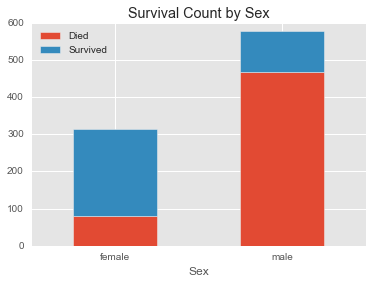

In [29]:
sex = df['Survived'].map({0:'Died', 1:'Survived'}).groupby(df['Sex']).value_counts().unstack()
sex.plot(kind='bar', rot=0, stacked=True, title='Survival Count by Sex')
plt.show()

**81.1%** of all males died, compared to only **25.8%** of females. This is a good attribute to keep in mind when selecting features.